<a href="https://colab.research.google.com/github/purnaa-l/eras-tour/blob/main/eras_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
data_train_path='/content/drive/MyDrive/eras-tour/train'
data_test_path='/content/drive/MyDrive/eras-tour/test'
data_validation_path='/content/drive/MyDrive/eras-tour/validation'


In [31]:
img_width=180
img_height=180

data_train=tf.keras.utils.image_dataset_from_directory(data_train_path, shuffle=True, image_size=(180, 180), batch_size=32, validation_split=False)

Found 29 files belonging to 6 classes.


In [32]:
data_train.class_names

['1989', 'debut', 'fearless', 'red', 'reputation', 'speaknow']

In [33]:
data_cat=data_train.class_names
data_val=tf.keras.utils.image_dataset_from_directory(data_validation_path, shuffle=False, image_size=(180, 180), batch_size=32, validation_split=False)
from tensorflow.keras.models import Sequential
model=Sequential([
    layers.Rescaling(1./255), layers.Conv2D(16, 3, padding='same', activation='relu'), layers.MaxPooling2D(), layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(), layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2), layers.Dense(128), layers.Dense(len(data_cat))

])


Found 29 files belonging to 6 classes.


In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
from pathlib import Path
from PIL import Image

def find_bad_images(root):
    root = Path(root)
    bad = []
    for p in root.rglob("*.*"):
        if p.suffix.lower() not in [".jpg", ".jpeg", ".png", ".bmp", ".gif"]:
            bad.append(p)
            continue
        try:
            with Image.open(p) as img:
                img.verify()      # check integrity
        except Exception:
            bad.append(p)
    return bad

bad_files = find_bad_images("dataset")   # <-- adjust to your dataset root
print("Bad files:", len(bad_files))
for f in bad_files:
    print(f)


Bad files: 0


In [36]:
for f in bad_files:
    f.unlink()   # or manually delete
    if not url.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
      continue   # skip unsupported formats



In [39]:
from pathlib import Path
from PIL import Image

def find_bad_images(root):
    root = Path(root)
    bad = []
    for p in root.rglob("*.*"):
        if p.suffix.lower() not in [".jpg", ".jpeg", ".png", ".bmp", ".gif"]:
            bad.append(p)
            continue
        try:
            with Image.open(p) as img:
                img.verify()  # check integrity
        except Exception:
            bad.append(p)
    return bad

# Scan all splits
roots = [
    "/content/drive/MyDrive/eras-tour/train",
    "/content/drive/MyDrive/eras-tour/validation",
    "/content/drive/MyDrive/eras-tour/test",
]
for r in roots:
    bad_files = find_bad_images(r)
    print(f"{r} -> Bad files: {len(bad_files)}")
    for f in bad_files:
        print("  deleting", f)
        f.unlink()  # remove bad file


/content/drive/MyDrive/eras-tour/train -> Bad files: 6
  deleting /content/drive/MyDrive/eras-tour/train/fearless/.ipynb_checkpoints


IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/eras-tour/train/fearless/.ipynb_checkpoints'

In [37]:
history = model.fit(data_train, validation_data=data_val, epochs=25)


Epoch 1/25


InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_9227]

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import os

#-------------------------------------------------------
# 1. Mount Google Drive
#-------------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

# Paths
data_train_path      = '/content/drive/MyDrive/eras-tour/train'
data_validation_path = '/content/drive/MyDrive/eras-tour/validation'
data_test_path       = '/content/drive/MyDrive/eras-tour/test'

#-------------------------------------------------------
# 2. Clean bad files (corrupt images OR stray directories)
#-------------------------------------------------------
def clean_dataset(root):
    root = Path(root)
    bad_files = []
    for p in root.rglob("*"):
        # Skip directories entirely
        if p.is_dir():
            continue
        # Keep only accepted extensions
        if p.suffix.lower() not in [".jpg", ".jpeg", ".png", ".bmp", ".gif"]:
            bad_files.append(p)
            p.unlink()
            continue
        # Verify image integrity
        try:
            with Image.open(p) as img:
                img.verify()
        except Exception:
            bad_files.append(p)
            p.unlink()
    return bad_files

for folder in [data_train_path, data_validation_path, data_test_path]:
    bad = clean_dataset(folder)
    print(f"{folder} -> removed {len(bad)} bad files")

#-------------------------------------------------------
# 3. Create tf.data datasets
#-------------------------------------------------------
img_height = 180
img_width  = 180
batch_size = 32

data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

data_val = tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Class names for output layer
class_names = data_train.class_names
print("Classes:", class_names)

# Optional: AUTOTUNE for performance
AUTOTUNE = tf.data.AUTOTUNE
data_train = data_train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
data_val   = data_val.cache().prefetch(buffer_size=AUTOTUNE)
data_test  = data_test.cache().prefetch(buffer_size=AUTOTUNE)

#-------------------------------------------------------
# 4. Build the model
#-------------------------------------------------------
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names))  # logits
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

from pathlib import Path
from PIL import Image
import os

def deep_scan(root):
    root = Path(root)
    bad = []
    for p in root.rglob("*"):
        if p.is_dir():
            continue
        # check file size first
        if p.stat().st_size == 0:
            bad.append(("empty", p))
            continue
        # check extension
        if p.suffix.lower() not in [".jpg", ".jpeg", ".png", ".bmp", ".gif"]:
            bad.append(("ext", p))
            continue
        # attempt to open & convert
        try:
            with Image.open(p) as img:
                img.verify()
        except Exception as e:
            bad.append(("corrupt", p))
    return bad

all_bad = []
for folder in [data_train_path, data_validation_path, data_test_path]:
    bad = deep_scan(folder)
    print(f"{folder} -> bad files: {len(bad)}")
    for kind, f in bad:
        print(f"  [{kind}] {f}")
    all_bad.extend([f for kind,f in bad])

# Delete them if you're sure
for f in all_bad:
    print("Deleting:", f)
    f.unlink()


#-------------------------------------------------------
# 5. Train
#-------------------------------------------------------
epochs = 25
history = model.fit(
    data_train,
    validation_data=data_val,
    epochs=epochs
)

#-------------------------------------------------------
# 6. Evaluate on test set
#-------------------------------------------------------
test_loss, test_acc = model.evaluate(data_test)
print("Test accuracy:", test_acc)

# Plot training history
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/eras-tour/train -> removed 0 bad files
/content/drive/MyDrive/eras-tour/validation -> removed 0 bad files
/content/drive/MyDrive/eras-tour/test -> removed 0 bad files
Found 29 files belonging to 6 classes.
Found 29 files belonging to 6 classes.
Found 7 files belonging to 6 classes.
Classes: ['1989', 'debut', 'fearless', 'red', 'reputation', 'speaknow']


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,414 (15.22 MB)

 Trainable params: 3,989,414 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

/content/drive/MyDrive/eras-tour/train -> bad files: 0
/content/drive/MyDrive/eras-tour/validation -> bad files: 0
/content/drive/MyDrive/eras-tour/test -> bad files: 0
Epoch 1/25


InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_15645]

In [43]:
from pathlib import Path
from PIL import Image
import os

def deep_scan(root):
    root = Path(root)
    bad = []
    for p in root.rglob("*"):
        if p.is_dir():
            continue
        # check file size first
        if p.stat().st_size == 0:
            bad.append(("empty", p))
            continue
        # check extension
        if p.suffix.lower() not in [".jpg", ".jpeg", ".png", ".bmp", ".gif"]:
            bad.append(("ext", p))
            continue
        # attempt to open & convert
        try:
            with Image.open(p) as img:
                img.verify()
        except Exception as e:
            bad.append(("corrupt", p))
    return bad

all_bad = []
for folder in [data_train_path, data_validation_path, data_test_path]:
    bad = deep_scan(folder)
    print(f"{folder} -> bad files: {len(bad)}")
    for kind, f in bad:
        print(f"  [{kind}] {f}")
    all_bad.extend([f for kind,f in bad])

# Delete them if you're sure
for f in all_bad:
    print("Deleting:", f)
    f.unlink()


/content/drive/MyDrive/eras-tour/train -> bad files: 0
/content/drive/MyDrive/eras-tour/validation -> bad files: 0
/content/drive/MyDrive/eras-tour/test -> bad files: 0


In [44]:
AUTOTUNE = tf.data.AUTOTUNE

data_train = (
    tf.keras.utils.image_dataset_from_directory(
        data_train_path,
        shuffle=True,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )
    .apply(tf.data.experimental.ignore_errors())    # <- skip unreadable images
    .cache()
    .shuffle(1000)
    .prefetch(buffer_size=AUTOTUNE)
)

data_val = (
    tf.keras.utils.image_dataset_from_directory(
        data_validation_path,
        shuffle=True,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )
    .apply(tf.data.experimental.ignore_errors())    # <- skip unreadable images
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)


Found 29 files belonging to 6 classes.


Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


Found 29 files belonging to 6 classes.


In [45]:
from pathlib import Path
from PIL import Image

def convert_to_rgb(folder):
    folder = Path(folder)
    for p in folder.rglob("*"):
        if p.is_dir():
            continue
        if p.suffix.lower() not in [".jpg", ".jpeg", ".png"]:
            continue
        try:
            with Image.open(p) as img:
                rgb = img.convert("RGB")           # ensure RGB
                # overwrite as PNG to avoid JPEG subsampling issues
                rgb.save(p.with_suffix(".png"))
                if p.suffix.lower() != ".png":
                    p.unlink()                     # remove old file
        except Exception as e:
            print("Failed to convert:", p, e)

for folder in [data_train_path, data_validation_path, data_test_path]:
    convert_to_rgb(folder)


In [46]:
import tensorflow as tf
print(tf.__version__)


2.19.0


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/eras-tour/train -> removed 0 bad files
/content/drive/MyDrive/eras-tour/validation -> removed 0 bad files
/content/drive/MyDrive/eras-tour/test -> removed 0 bad files
Found 29 files belonging to 6 classes.
Found 29 files belonging to 6 classes.
Found 7 files belonging to 6 classes.
Classes: ['1989', 'debut', 'fearless', 'red', 'reputation', 'speaknow']


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,414 (15.22 MB)

 Trainable params: 3,989,414 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

/content/drive/MyDrive/eras-tour/train -> bad files: 0
/content/drive/MyDrive/eras-tour/validation -> bad files: 0
/content/drive/MyDrive/eras-tour/test -> bad files: 0
Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2069 - loss: 1.7866 - val_accuracy: 0.2069 - val_loss: 1.6923
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2069 - loss: 1.6925 - val_accuracy: 0.4828 - val_loss: 1.6725
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5172 - loss: 1.6680 - val_accuracy: 0.6552 - val_loss: 1.3294
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6552 - loss: 1.3379 - val_accuracy: 0.7586 - val_loss: 1.0332
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7586 - loss: 1.0457 - val_accuracy: 0.9310 - val_loss: 0.7753
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9310 - loss: 0.7771 - val_accuracy: 0.8621 - val_loss: 0.5856
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8621 - loss: 0.5894 - val_accura

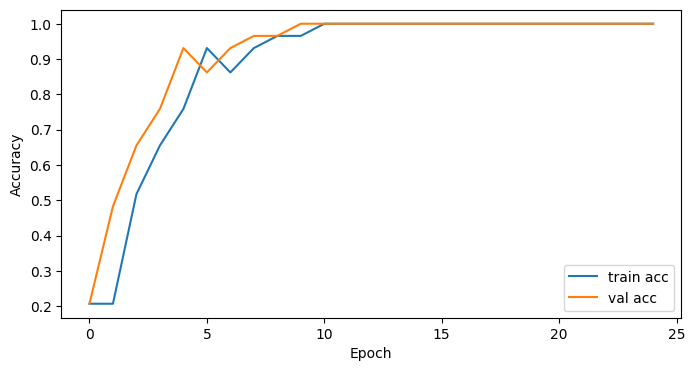

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import os

#-------------------------------------------------------
# 1. Mount Google Drive
#-------------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

# Paths
data_train_path      = '/content/drive/MyDrive/eras-tour/train'
data_validation_path = '/content/drive/MyDrive/eras-tour/validation'
data_test_path       = '/content/drive/MyDrive/eras-tour/test'

#-------------------------------------------------------
# 2. Clean bad files (corrupt images OR stray directories)
#-------------------------------------------------------
def clean_dataset(root):
    root = Path(root)
    bad_files = []
    for p in root.rglob("*"):
        # Skip directories entirely
        if p.is_dir():
            continue
        # Keep only accepted extensions
        if p.suffix.lower() not in [".jpg", ".jpeg", ".png", ".bmp", ".gif"]:
            bad_files.append(p)
            p.unlink()
            continue
        # Verify image integrity
        try:
            with Image.open(p) as img:
                img.verify()
        except Exception:
            bad_files.append(p)
            p.unlink()
    return bad_files

for folder in [data_train_path, data_validation_path, data_test_path]:
    bad = clean_dataset(folder)
    print(f"{folder} -> removed {len(bad)} bad files")

#-------------------------------------------------------
# 3. Create tf.data datasets
#-------------------------------------------------------
img_height = 180
img_width  = 180
batch_size = 32

data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

data_val = tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Class names for output layer
class_names = data_train.class_names
print("Classes:", class_names)

# Optional: AUTOTUNE for performance
AUTOTUNE = tf.data.AUTOTUNE
data_train = data_train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
data_val   = data_val.cache().prefetch(buffer_size=AUTOTUNE)
data_test  = data_test.cache().prefetch(buffer_size=AUTOTUNE)

#-------------------------------------------------------
# 4. Build the model
#-------------------------------------------------------
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names))  # logits
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

from pathlib import Path
from PIL import Image
import os

def deep_scan(root):
    root = Path(root)
    bad = []
    for p in root.rglob("*"):
        if p.is_dir():
            continue
        # check file size first
        if p.stat().st_size == 0:
            bad.append(("empty", p))
            continue
        # check extension
        if p.suffix.lower() not in [".jpg", ".jpeg", ".png", ".bmp", ".gif"]:
            bad.append(("ext", p))
            continue
        # attempt to open & convert
        try:
            with Image.open(p) as img:
                img.verify()
        except Exception as e:
            bad.append(("corrupt", p))
    return bad

all_bad = []
for folder in [data_train_path, data_validation_path, data_test_path]:
    bad = deep_scan(folder)
    print(f"{folder} -> bad files: {len(bad)}")
    for kind, f in bad:
        print(f"  [{kind}] {f}")
    all_bad.extend([f for kind,f in bad])

# Delete them if you're sure
for f in all_bad:
    print("Deleting:", f)
    f.unlink()


#-------------------------------------------------------
# 5. Train
#-------------------------------------------------------
epochs = 25
history = model.fit(
    data_train,
    validation_data=data_val,
    epochs=epochs
)

#-------------------------------------------------------
# 6. Evaluate on test set
#-------------------------------------------------------
test_loss, test_acc = model.evaluate(data_test)
print("Test accuracy:", test_acc)

# Plot training history
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


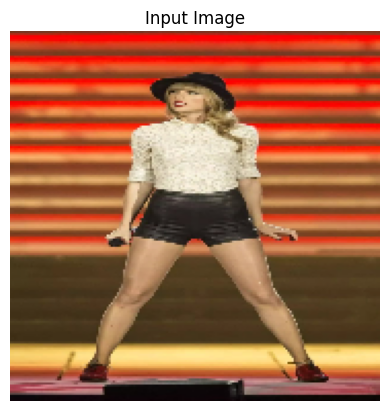

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Top-5 predicted eras:
  reputation : 85.35%
  red : 8.80%
  fearless : 2.78%
  1989 : 2.52%
  speaknow : 0.36%


In [50]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. Path to the image you want to test
# ------------------------------------------------------------
img_path = "/content/drive/MyDrive/eras-tour/test/red/1.png"

# Target size must match the training image size
img_height = 180
img_width  = 180

# ------------------------------------------------------------
# 2. Load the image and display it
# ------------------------------------------------------------
img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
plt.imshow(img)
plt.axis('off')
plt.title("Input Image")
plt.show()

# ------------------------------------------------------------
# 3. Preprocess for model prediction
# ------------------------------------------------------------
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)   # shape (1,180,180,3)
img_array = img_array / 255.0              # safe normalization

# ------------------------------------------------------------
# 4. Predict and print Top-5 eras
# ------------------------------------------------------------
pred_logits = model.predict(img_array)
pred_probs  = tf.nn.softmax(pred_logits[0]).numpy()

top5_idx = pred_probs.argsort()[-5:][::-1]
print("Top-5 predicted eras:")
for idx in top5_idx:
    print(f"  {class_names[idx]} : {pred_probs[idx]*100:.2f}%")


Found 29 files belonging to 6 classes.
Found 29 files belonging to 6 classes.
Found 7 files belonging to 6 classes.
Classes: ['1989', 'debut', 'fearless', 'red', 'reputation', 'speaknow']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_8 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 6)              │         7,686 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,265,670 (8.64 MB)

 Trainable params: 7,686 (30.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.2069 - loss: 2.3543 - val_accuracy: 0.2069 - val_loss: 1.8808
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1379 - loss: 2.1732 - val_accuracy: 0.2414 - val_loss: 1.7687
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2414 - loss: 2.0535 - val_accuracy: 0.2759 - val_loss: 1.6747
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2414 - loss: 1.9596 - val_accuracy: 0.3793 - val_loss: 1.5956
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3103 - loss: 1.8374 - val_accuracy: 0.3793 - val_loss: 1.5289
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2759 - loss: 1.5783 - val_accuracy: 0.4828 - val_loss: 1.4523
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3103 - loss: 1.6526 - val_accuracy: 0.4828 - val_loss: 1.3750
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3793 - loss: 1.5052 - val_accuracy: 0.5517 - val_loss: 1.3009
Epoch 9/15
1/1

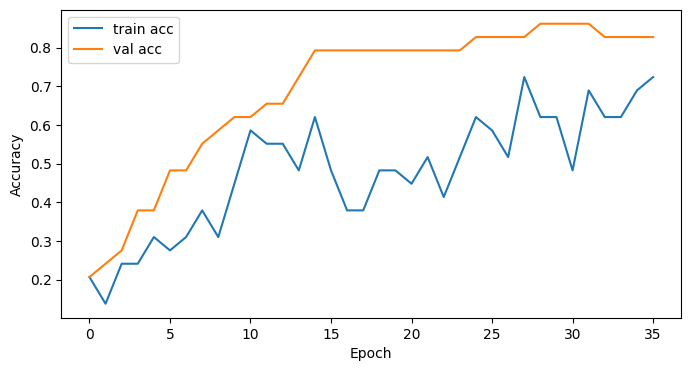

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Paths (already defined earlier)
train_dir = '/content/drive/MyDrive/eras-tour/train'
val_dir   = '/content/drive/MyDrive/eras-tour/validation'
test_dir  = '/content/drive/MyDrive/eras-tour/test'

img_size  = (224, 224)      # MobileNetV2 default
batch_size = 32

# -------------------------------------------------------
# 1️⃣ Data Augmentation Pipeline
# -------------------------------------------------------
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2)
])

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    shuffle=True,
    image_size=img_size,
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=False,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)

# -------------------------------------------------------
# 2️⃣ Pre-trained MobileNetV2 Base
# -------------------------------------------------------
base_model = tf.keras.applications.MobileNetV2(
    input_shape=img_size + (3,),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False   # Freeze base for first training phase

# -------------------------------------------------------
# 3️⃣ Build Model
# -------------------------------------------------------
inputs = keras.Input(shape=img_size + (3,))
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# -------------------------------------------------------
# 4️⃣ Train the top layers
# -------------------------------------------------------
initial_epochs = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=initial_epochs
)

# -------------------------------------------------------
# 5️⃣ Fine-tune the base model
# -------------------------------------------------------
base_model.trainable = True

# Unfreeze from a deeper layer for gentle fine-tuning
fine_tune_at = 100   # train last 100 layers of MobileNetV2
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

fine_tune_epochs = 20
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1]
)

# -------------------------------------------------------
# 6️⃣ Evaluate on test set
# -------------------------------------------------------
test_loss, test_acc = model.evaluate(test_ds)
print("Test accuracy:", test_acc)

# Plot
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


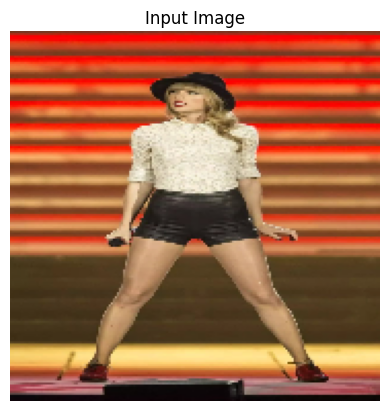

ValueError: Input 0 of layer "functional_9" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(1, 180, 180, 3)

In [52]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. Path to the image you want to test
# ------------------------------------------------------------
img_path = "/content/drive/MyDrive/eras-tour/test/red/1.png"

# Target size must match the training image size
img_height = 180
img_width  = 180

# ------------------------------------------------------------
# 2. Load the image and display it
# ------------------------------------------------------------
img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
plt.imshow(img)
plt.axis('off')
plt.title("Input Image")
plt.show()

# ------------------------------------------------------------
# 3. Preprocess for model prediction
# ------------------------------------------------------------
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)   # shape (1,180,180,3)
img_array = img_array / 255.0              # safe normalization

# ------------------------------------------------------------
# 4. Predict and print Top-5 eras
# ------------------------------------------------------------
pred_logits = model.predict(img_array)
pred_probs  = tf.nn.softmax(pred_logits[0]).numpy()

top5_idx = pred_probs.argsort()[-5:][::-1]
print("Top-5 predicted eras:")
for idx in top5_idx:
    print(f"  {class_names[idx]} : {pred_probs[idx]*100:.2f}%")


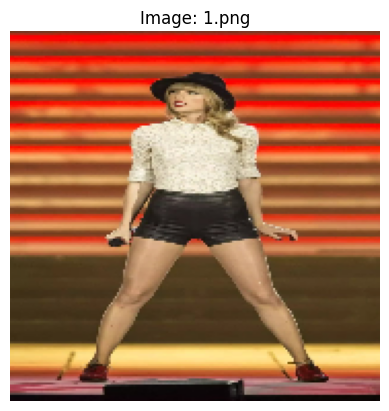

ValueError: Input 0 of layer "functional_9" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(1, 180, 180, 3)

In [53]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. Folder containing test images
# ------------------------------------------------------------
test_folder = "/content/drive/MyDrive/eras-tour/test/red"   # change if needed
img_height, img_width = 180, 180

# ------------------------------------------------------------
# 2. Loop through all images
# ------------------------------------------------------------
for fname in sorted(os.listdir(test_folder)):
    if not fname.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")):
        continue   # skip non-image files

    img_path = os.path.join(test_folder, fname)

    # ---- Load & display ----
    img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image: {fname}")
    plt.show()

    # ---- Preprocess ----
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)      # shape (1, 180, 180, 3)
    img_array = img_array / 255.0                 # normalize

    # ---- Predict ----
    preds = model.predict(img_array, verbose=0)
    probs = tf.nn.softmax(preds[0]).numpy()

    # ---- Top-5 ----
    top5_idx = probs.argsort()[-5:][::-1]
    print(f"Top-5 predicted eras for {fname}:")
    for idx in top5_idx:
        print(f"  {class_names[idx]} : {probs[idx]*100:.2f}%")
    print("-" * 40)


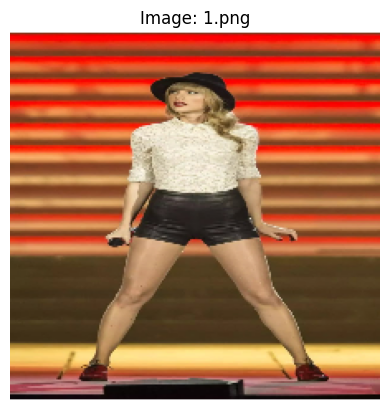

Top-5 predicted eras for 1.png:
  reputation : 22.60%
  1989 : 18.07%
  speaknow : 16.29%
  debut : 14.70%
  red : 14.24%
----------------------------------------


In [54]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Adjust to model's expected size (224 if you used MobileNetV2 or similar)
img_height = 224
img_width  = 224

test_folder = "/content/drive/MyDrive/eras-tour/test/red"  # adjust as needed

for fname in sorted(os.listdir(test_folder)):
    if not fname.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")):
        continue

    img_path = os.path.join(test_folder, fname)

    # --- Load & Display ---
    img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image: {fname}")
    plt.show()

    # --- Preprocess ---
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)      # (1, 224, 224, 3)
    img_array = img_array / 255.0

    # --- Predict ---
    preds = model.predict(img_array, verbose=0)
    probs = tf.nn.softmax(preds[0]).numpy()

    top5_idx = probs.argsort()[-5:][::-1]
    print(f"Top-5 predicted eras for {fname}:")
    for idx in top5_idx:
        print(f"  {class_names[idx]} : {probs[idx]*100:.2f}%")
    print("-"*40)


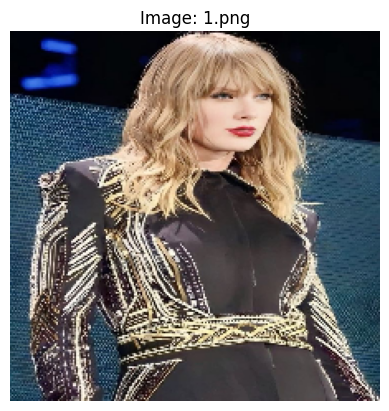

Top-5 predicted eras for 1.png:
  reputation : 22.76%
  1989 : 17.80%
  speaknow : 16.32%
  debut : 14.69%
  red : 14.30%
----------------------------------------


In [55]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Adjust to model's expected size (224 if you used MobileNetV2 or similar)
img_height = 224
img_width  = 224

test_folder = "/content/drive/MyDrive/eras-tour/test/reputation"  # adjust as needed

for fname in sorted(os.listdir(test_folder)):
    if not fname.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")):
        continue

    img_path = os.path.join(test_folder, fname)

    # --- Load & Display ---
    img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image: {fname}")
    plt.show()

    # --- Preprocess ---
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)      # (1, 224, 224, 3)
    img_array = img_array / 255.0

    # --- Predict ---
    preds = model.predict(img_array, verbose=0)
    probs = tf.nn.softmax(preds[0]).numpy()

    top5_idx = probs.argsort()[-5:][::-1]
    print(f"Top-5 predicted eras for {fname}:")
    for idx in top5_idx:
        print(f"  {class_names[idx]} : {probs[idx]*100:.2f}%")
    print("-"*40)


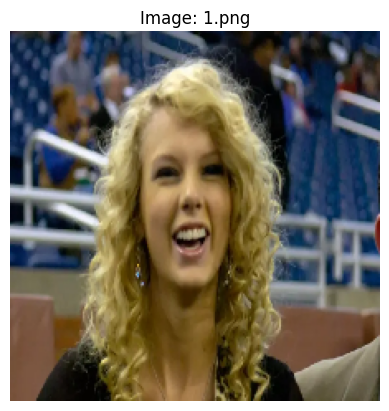

Top-5 predicted eras for 1.png:
  reputation : 22.52%
  1989 : 17.87%
  speaknow : 16.54%
  debut : 14.69%
  red : 14.25%
----------------------------------------


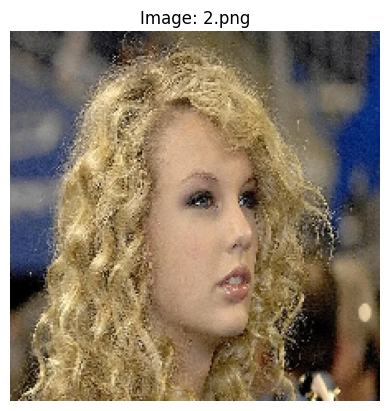

Top-5 predicted eras for 2.png:
  reputation : 22.85%
  1989 : 17.94%
  speaknow : 16.20%
  debut : 14.64%
  red : 14.27%
----------------------------------------


In [56]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Adjust to model's expected size (224 if you used MobileNetV2 or similar)
img_height = 224
img_width  = 224

test_folder = "/content/drive/MyDrive/eras-tour/test/debut"  # adjust as needed

for fname in sorted(os.listdir(test_folder)):
    if not fname.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")):
        continue

    img_path = os.path.join(test_folder, fname)

    # --- Load & Display ---
    img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image: {fname}")
    plt.show()

    # --- Preprocess ---
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)      # (1, 224, 224, 3)
    img_array = img_array / 255.0

    # --- Predict ---
    preds = model.predict(img_array, verbose=0)
    probs = tf.nn.softmax(preds[0]).numpy()

    top5_idx = probs.argsort()[-5:][::-1]
    print(f"Top-5 predicted eras for {fname}:")
    for idx in top5_idx:
        print(f"  {class_names[idx]} : {probs[idx]*100:.2f}%")
    print("-"*40)


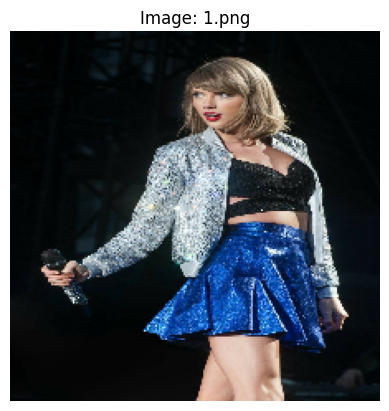

Top-5 predicted eras for 1.png:
  reputation : 22.91%
  1989 : 17.86%
  speaknow : 16.22%
  debut : 14.66%
  red : 14.24%
----------------------------------------


In [57]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Adjust to model's expected size (224 if you used MobileNetV2 or similar)
img_height = 224
img_width  = 224

test_folder = "/content/drive/MyDrive/eras-tour/test/1989"  # adjust as needed

for fname in sorted(os.listdir(test_folder)):
    if not fname.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")):
        continue

    img_path = os.path.join(test_folder, fname)

    # --- Load & Display ---
    img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image: {fname}")
    plt.show()

    # --- Preprocess ---
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)      # (1, 224, 224, 3)
    img_array = img_array / 255.0

    # --- Predict ---
    preds = model.predict(img_array, verbose=0)
    probs = tf.nn.softmax(preds[0]).numpy()

    top5_idx = probs.argsort()[-5:][::-1]
    print(f"Top-5 predicted eras for {fname}:")
    for idx in top5_idx:
        print(f"  {class_names[idx]} : {probs[idx]*100:.2f}%")
    print("-"*40)


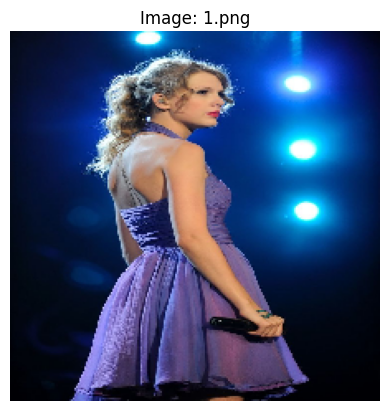

Top-5 predicted eras for 1.png:
  reputation : 22.67%
  1989 : 17.90%
  speaknow : 16.33%
  debut : 14.70%
  red : 14.28%
----------------------------------------


In [58]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Adjust to model's expected size (224 if you used MobileNetV2 or similar)
img_height = 224
img_width  = 224

test_folder = "/content/drive/MyDrive/eras-tour/test/speaknow"  # adjust as needed

for fname in sorted(os.listdir(test_folder)):
    if not fname.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")):
        continue

    img_path = os.path.join(test_folder, fname)

    # --- Load & Display ---
    img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image: {fname}")
    plt.show()

    # --- Preprocess ---
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)      # (1, 224, 224, 3)
    img_array = img_array / 255.0

    # --- Predict ---
    preds = model.predict(img_array, verbose=0)
    probs = tf.nn.softmax(preds[0]).numpy()

    top5_idx = probs.argsort()[-5:][::-1]
    print(f"Top-5 predicted eras for {fname}:")
    for idx in top5_idx:
        print(f"  {class_names[idx]} : {probs[idx]*100:.2f}%")
    print("-"*40)


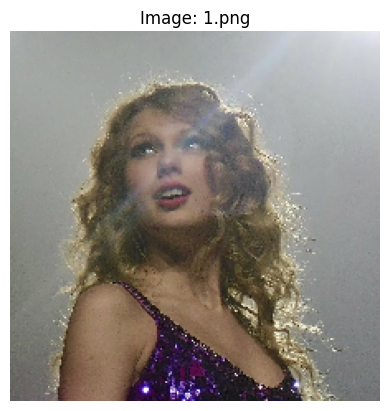

Top-5 predicted eras for 1.png:
  reputation : 22.85%
  1989 : 17.95%
  speaknow : 16.17%
  debut : 14.65%
  red : 14.28%
----------------------------------------


In [59]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Adjust to model's expected size (224 if you used MobileNetV2 or similar)
img_height = 224
img_width  = 224

test_folder = "/content/drive/MyDrive/eras-tour/test/fearless"  # adjust as needed

for fname in sorted(os.listdir(test_folder)):
    if not fname.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")):
        continue

    img_path = os.path.join(test_folder, fname)

    # --- Load & Display ---
    img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image: {fname}")
    plt.show()

    # --- Preprocess ---
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)      # (1, 224, 224, 3)
    img_array = img_array / 255.0

    # --- Predict ---
    preds = model.predict(img_array, verbose=0)
    probs = tf.nn.softmax(preds[0]).numpy()

    top5_idx = probs.argsort()[-5:][::-1]
    print(f"Top-5 predicted eras for {fname}:")
    for idx in top5_idx:
        print(f"  {class_names[idx]} : {probs[idx]*100:.2f}%")
    print("-"*40)
